In [1]:
import matplotlib.pyplot as plt
import numpy as np
import utils
from mojito import MojitoL1File
from mojito.lazy import ScaledStackedDataset
from scipy.signal import decimate
import os
import re

In [3]:
mojito_dir = "/Volumes/deichdrive/mojito" # top-most directory
data_tag = "mojito_light_2p5s" # mojito_light or whatever
source_type = "SOBHB" # Options: EMRI, MBHB, SOBHB, GB, VGB, INSTRUMENT
data_level = "L1" # L0 or L1
data_dir = f"{mojito_dir}/{data_tag}/data/{source_type}/{data_level}"
data_list = sorted(os.listdir(data_dir), key=utils.extract_source_number) # sort by source number
src_num = 0
data_name = data_list[src_num] # the index here corresponds to source number
data_path = f"{data_dir}/{data_name}"
print(data_path)

/Volumes/deichdrive/mojito/mojito_light_2p5s/data/SOBHB/L1/SOBHB_731d_2.5s_L1_source0_0_20251215T183326586390Z.h5


In [4]:
# find files, sort them, and extract a data array from each, 
# and put them in a list
array_list = []
for data_name in data_list[:3]:
    data_path = f"{data_dir}/{data_name}"
    with MojitoL1File(data_path, "r") as f:
        array_list.append(f.tdis.x2[:])
        print(data_name)

SOBHB_731d_2.5s_L1_source0_0_20251215T183326586390Z.h5
SOBHB_731d_2.5s_L1_source1_0_20251215T183512400400Z.h5
SOBHB_731d_2.5s_L1_source2_0_20251215T183357150607Z.h5


In [5]:
sys.getsizeof(array_list[0])

201971952

In [6]:
# put the above list into a lazy stacked dataset
# for rapid and memory-efficient recovery

stacked_array_list = ScaledStackedDataset(array_list)

del array_list # delete the array list to free up the memory

In [7]:
sys.getsizeof(stacked_array_list[0])

136

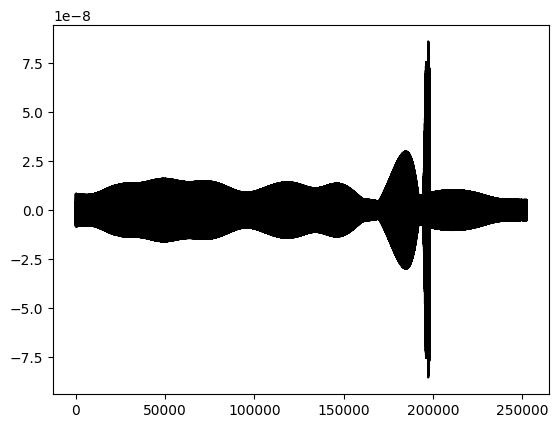

In [8]:
for i in range(3):
    plt.plot(stacked_array_list[::100,i], color = 'k')